In [184]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sklearn functions
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, f1_score, accuracy_score, classification_report, recall_score

# Importing data sampling methods
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection

In [2]:
# Intel CPU fastener
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Dealing with the data

In [3]:
# Scales the column
def scale_the_column(dataframe, column_name, column_index):
    rob_scaler = RobustScaler()
    df[f'scaled_{column_name}'] = rob_scaler.fit_transform(df[column_name].values.reshape(-1,1))
    df.drop([column_name], axis=1, inplace=True)
    scaled_column = df[f'scaled_{column_name}']
    df.drop([f'scaled_{column_name}'], axis=1, inplace=True)
    df.insert(column_index, f'scaled_{column_name}', scaled_column)
    return dataframe

# Undersampling with One Sided Selection
def undersampling(X_train, y_train):
    undersampling = OneSidedSelection(n_neighbors=3, n_seeds_S=200)
    X_train, y_train= undersampling.fit_resample(X_train, y_train)
    return X_train,y_train

# Oversampling with SMOTE
def oversampling_SMOTE(X_train, y_train):
    oversample = SMOTE(sampling_strategy='auto')
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    return X_train,y_train

# TODO: Rewrite want a more beautiful plot
def plot_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    plt.bar(unique, counts, color=['blue', 'red'])
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Distribution of Data Points')
    plt.xticks(unique, ['(0)', '(1)'])
    plt.show()

# Functions for prediction

In [4]:
def fit_and_predict(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train))
    pred = model.predict(X_test)
    return pred, model

In [5]:
# LOGISTIC REGRESSION
def logistic_reg_model(X_train, y_train, X_test):
    model = LogisticRegression(max_iter=100000)
    pred, model = fit_and_predict(X_train, y_train, X_test, model)
    return pred, model

# KNN
def knn_model(X_train, y_train, X_test):
    model = KNN(n_neighbors=3)
    pred, model = fit_and_predict(X_train, y_train, X_test, model)
    return pred, model

# SUPPORT VECTORE MACHINE
def SVM_model(X_train, y_train, X_test):
    model = SVC(kernel='linear', C=1.0, random_state = 42)
    pred, model = fit_and_predict(X_train, y_train, X_test, model)
    return pred, model

# RANDOM FOREST CLASSIFIER
def RFC_model(X_train, y_train, X_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    pred, model = fit_and_predict(X_train, y_train, X_test, model)
    return pred, model

# DECISION TREE CLASSIFIER
def DTC_model(X_train, y_train, X_test):
    model = DecisionTreeClassifier(random_state=42)
    pred, model = fit_and_predict(X_train, y_train, X_test, model)
    return pred, model

In [6]:
# SCORE BOARD
def print_score_board(X_train, y_train, X_test, y_test, model):

    # get model name and print
    if model == "svm":
        pred, classifier = SVM_model(X_train, y_train, X_test)
        print('===== {} ====='.format("SUPPORT VECTOR MACHINE"))
    elif model == "lr":
        pred, classifier = logistic_reg_model(X_train, y_train, X_test)
        print('===== {} ====='.format("LOGISTIC REGRESSION"))
    elif model == "knn":
        pred, classifier = knn_model(X_train, y_train, X_test)
        print('===== {} ====='.format("k-NEAREST NEIGHBORS MODEL"))
    elif model == "rfc":
        pred, classifier = RFC_model(X_train, y_train, X_test)
        print('===== {} ====='.format("RANDOM FOREST CLASSIFIER"))
    elif model == "dtc":
        pred, classifier = DTC_model(X_train, y_train, X_test)
        print('===== {} ====='.format("DECISION TREE CLASSIFIER"))


    classification = metrics.classification_report(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    print()
    print("Classification Report:" "\n", classification)
    print()
    auc_score = roc_auc_score(y_test, pred)
    print(f"AUC-ROC Score: {auc_score:.2f}")
    print()

    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))

    precisions.append(precision)
    auc_scores.append(auc_score)
    f_scores.append(f1score)
    cross.append(np.round(scores.mean(), 3) * 100)

    '''confusion_matrix = metrics.confusion_matrix(y_test, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()'''

# Data Reading

In [60]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
df = scale_the_column(df, "Amount",0)
df = scale_the_column(df, "Time", 1)

In [62]:
# Seperate the target and features
X = df.drop('Class', axis=1)
y = df['Class']

In [63]:
# Train - Test Split
X_train_org, X_test, y_train_org, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)
print('X_train_shape: ', X_train_org.shape, '\nX_test_Shape: ', X_test.shape,'\ny_train_shape: ', y_train_org.shape, '\ny_test_shape: ' , y_test.shape)

X_train_shape:  (199364, 30) 
X_test_Shape:  (85443, 30) 
y_train_shape:  (199364,) 
y_test_shape:  (85443,)


# Model Run

In [11]:
auc_scores=[]
cross=[]
precisions=[]
f_scores=[]

In [12]:
# undersampling with one-sided-selection
X_train_under, y_train_under = undersampling(X_train_org, y_train_org)
print(X_train_under.shape, y_train_under.shape)

(13467, 30) (13467,)


In [13]:
# oversampling with SMOTE
X_train_smote, y_train_smote = oversampling_SMOTE(X_train_org, y_train_org)
print(X_train_smote.shape, y_train_smote.shape)

(398016, 30) (398016,)


In [14]:
# undersampling with one-sided-selection and oversampling with SMOTE
X_train_both, y_train_both = oversampling_SMOTE(X_train_under, y_train_under)
print(X_train_both.shape, y_train_both.shape)

(26222, 30) (26222,)


# Model Trainings

In [15]:
 models = ["lr", "knn", "svm", "rfc", "dtc"]

In [16]:
for model in models:
  print("Model Name:" + model)
  print("ORIGINAL DATASET")
  print_score_board(X_train_org, y_train_org, X_test, y_test, model)
  print("UNDERSAMPLED DATASET")
  print_score_board(X_train_under, y_train_under, X_test, y_test, model)
  print("SMOTE DATASET")
  print_score_board(X_train_smote, y_train_smote, X_test, y_test, model)
  print("UNDERSAMPLED SMOTE DATASET")
  print_score_board(X_train_both, y_train_both, X_test, y_test, model)

Model Name:lr
ORIGINAL DATASET
0.9991773840813788
===== LOGISTIC REGRESSION =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443


AUC-ROC Score: 0.82

Cross Validation Mean Score:  99.9%
UNDERSAMPLED DATASET
0.9884161283136556
===== LOGISTIC REGRESSION =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443


AUC-ROC Score: 0.81

Cross Validation Mean Score:  98.8%
SMOTE DATASET


C:\Users\ilkim\AppData\Local\Programs\Python\Python312\Lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9447786018652516
===== LOGISTIC REGRESSION =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443


AUC-ROC Score: 0.95



C:\Users\ilkim\AppData\Local\Programs\Python\Python312\Lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ilkim\AppData\Local\Programs\Python\Python312\Lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Cross Validation Mean Score:  94.5%
UNDERSAMPLED SMOTE DATASET
0.9063381893066891
===== LOGISTIC REGRESSION =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.21      0.88      0.33       136

    accuracy                           0.99     85443
   macro avg       0.60      0.93      0.67     85443
weighted avg       1.00      0.99      1.00     85443


AUC-ROC Score: 0.93

Cross Validation Mean Score:  90.60000000000001%
Model Name:knn
ORIGINAL DATASET
0.9995786601392428
===== k-NEAREST NEIGHBORS MODEL =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.92      0.77      0.84       136

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443


AUC-ROC Score: 0.89



# Comparison

In [23]:
precisions

[0.8775510204081632,
 0.8762886597938144,
 0.05738816086760054,
 0.20695652173913043,
 0.9210526315789473,
 0.8991596638655462,
 0.4979253112033195,
 0.020123066688840844,
 0.7832167832167832,
 0.7832167832167832,
 0.05567830313742819,
 0.7300613496932515,
 0.954954954954955,
 0.926829268292683,
 0.8666666666666667,
 0.5150214592274678,
 0.7105263157894737,
 0.1555232558139535,
 0.39543726235741444,
 0.021410331958357887]

In [27]:
precisions_2d = np.array(precisions).reshape(-1, 4)
auc_scores_2d = np.array(auc_scores).reshape(-1, 4)
f_scores_2d = np.array(f_scores).reshape(-1, 4)
cross_2d = np.array(cross).reshape(-1, 4)

In [28]:
def visualize_accuracy(accuracy_values, model_names, categories,type):
    """
    Visualize accuracy values of multiple models in a line plot across 4 categories.

    Parameters:
    - accuracy_values (list of lists): List containing accuracy values for each model across categories.
    - model_names (list): List containing names of the models.
    - categories (list): List containing names of the 4 categories.
    """

    # Check if the length of accuracy_values and model_names are the same
    if len(accuracy_values) != len(model_names):
        raise ValueError("The length of accuracy_values and model_names must be the same.")

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each model's accuracy values across categories
    for i, (values, name) in enumerate(zip(accuracy_values, model_names)):
        ax.plot(categories, values, label=name, marker='o')  # You can customize the marker as per your choice

    # Set labels and title
    ax.set_xlabel('Categories')
    ax.set_ylabel(f'{type}')
    ax.set_title(f'{type} Comparison of Multiple Models Across Categories')

    # Add a legend to distinguish between models
    ax.legend()

    # Show the plot
    plt.grid(True)  # Add grid lines for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

In [29]:
model_names = ['Logistic Regression', 'kNN', 'Support Vector Machine', 'Random Forest Classifier', 'Decision Tree Classifier']

categories = ['Original', 'OneSidedSelection', 'SMOTE', 'SMOTE with OneSidedSelection']

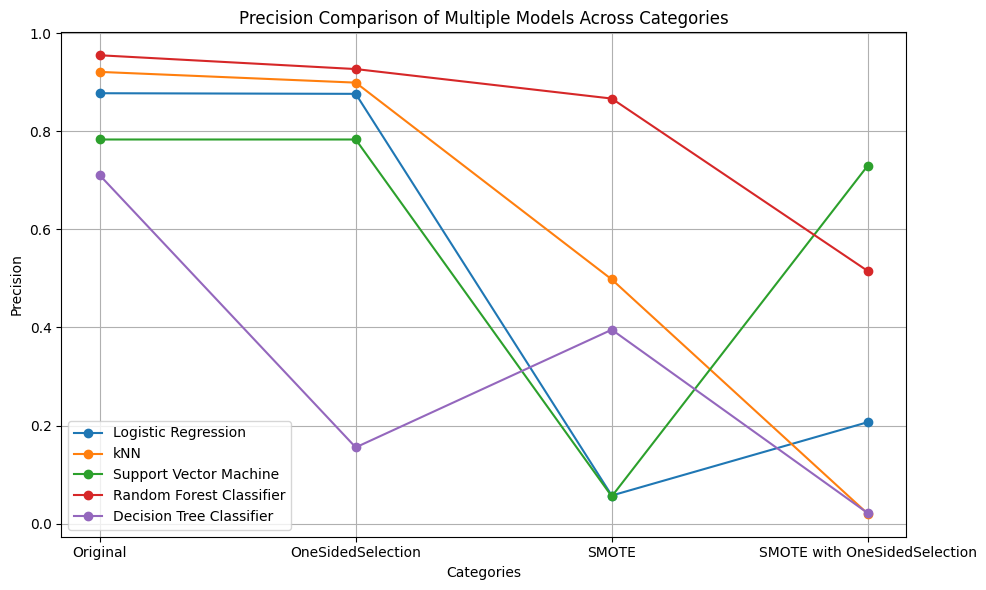

In [30]:
visualize_accuracy(precisions_2d, model_names, categories, type="Precision")

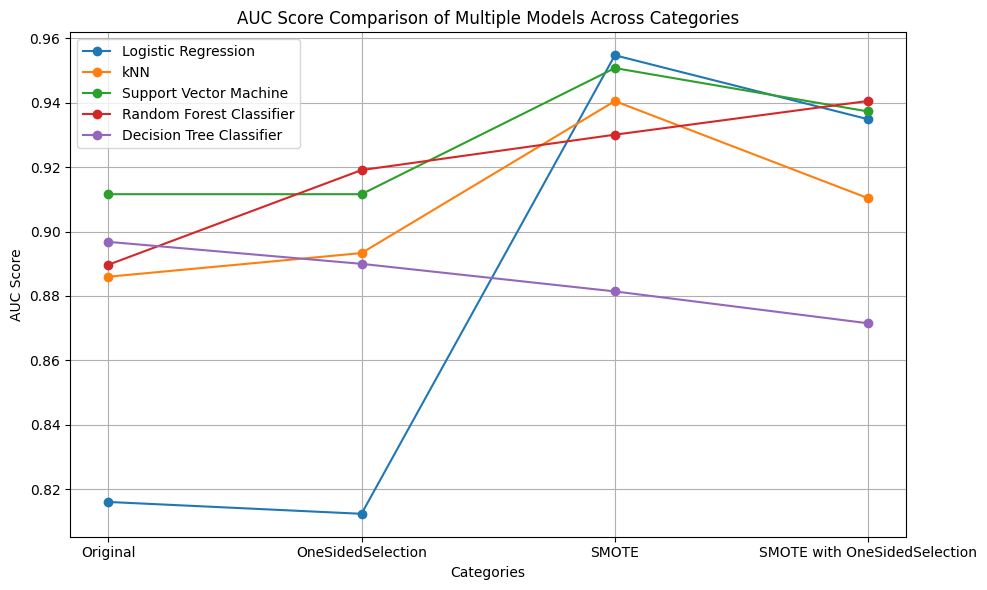

In [31]:
visualize_accuracy(auc_scores_2d, model_names, categories, type="AUC Score")

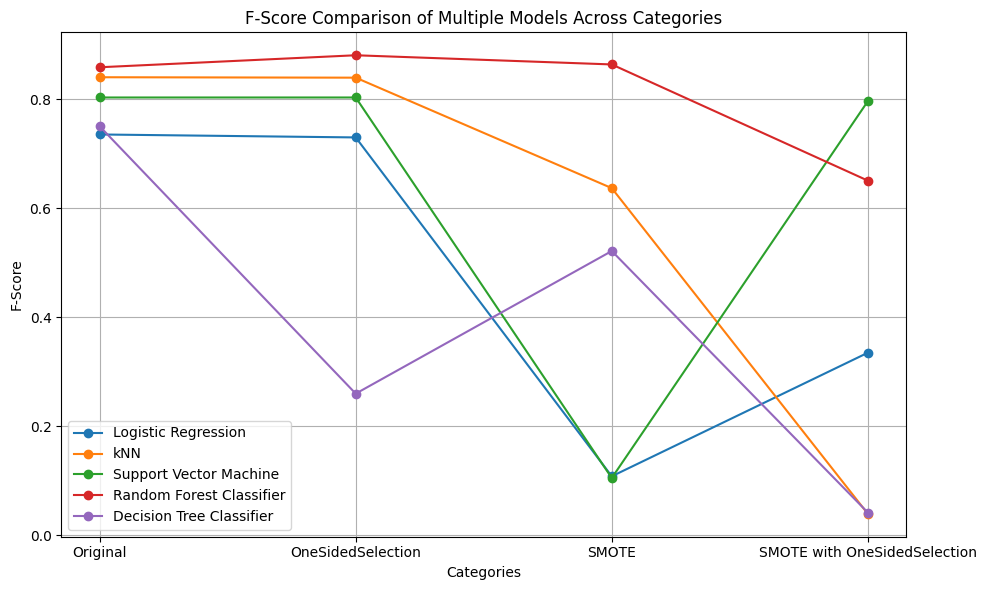

In [32]:
visualize_accuracy(f_scores_2d, model_names, categories, type="F-Score")

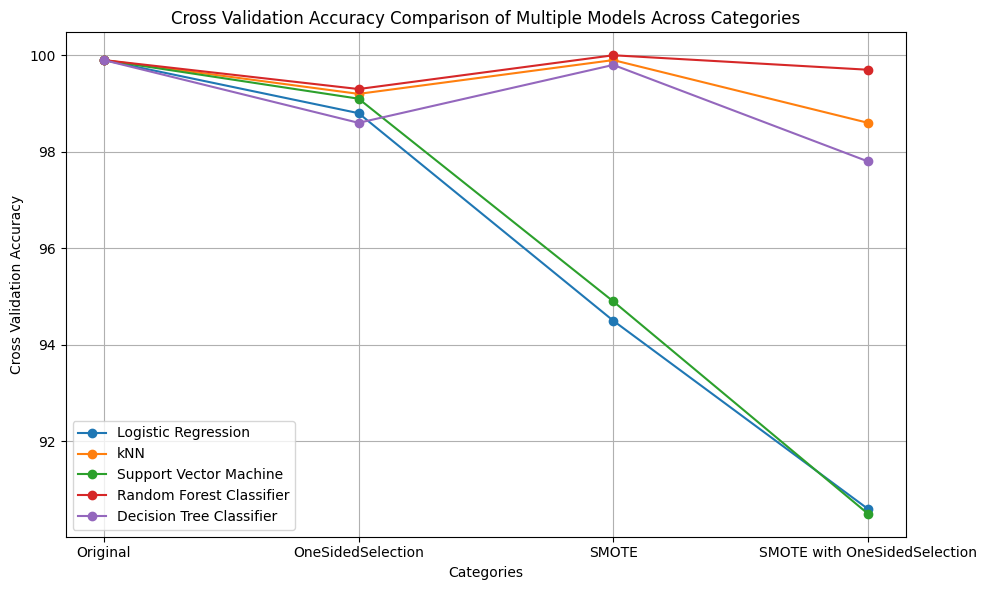

In [33]:
visualize_accuracy(cross_2d, model_names, categories, type="Cross Validation Accuracy")

# Neural Network Part

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
# Importing torch
import torch
import torch.nn as nn
import torch.optim as optim

In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [37]:
device

device(type='cuda')

In [38]:
# Define the neural network architecture
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # Output layer with 2 classes (fraud, not fraud)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

In [45]:
scaler = StandardScaler()

In [143]:
auc_scores_nn=[]
precisions_nn=[]
f_scores_nn=[]

## Original

In [144]:
X_train = scaler.fit_transform(X_train_org)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train_org.values).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test.values).to(device)

In [145]:
# Initialize the ANN model
input_dim = X_train.shape[1]
model = ANN(input_dim)
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [146]:
epochs = 60
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [5/60], Loss: 0.6632
Epoch [10/60], Loss: 0.5944
Epoch [15/60], Loss: 0.5254
Epoch [20/60], Loss: 0.4551
Epoch [25/60], Loss: 0.3837
Epoch [30/60], Loss: 0.3130
Epoch [35/60], Loss: 0.2461
Epoch [40/60], Loss: 0.1868
Epoch [45/60], Loss: 0.1379
Epoch [50/60], Loss: 0.1004
Epoch [55/60], Loss: 0.0732
Epoch [60/60], Loss: 0.0544


In [147]:
# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted.cpu().numpy())
    print(f'Accuracy on test set: {accuracy:.2f}')

    # Compute precision, recall, and AUC score
    print("Classification Report:")
    print(classification_report(y_test, predicted.cpu().numpy()))

    # Compute AUC score
    y_prob = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
    auc_score = roc_auc_score(y_test, y_prob)
    print(f'AUC Score: {auc_score:.2f}')

    precision = precision_score(y_test, predicted.cpu().numpy())
    f1score = f1_score(y_test, predicted.cpu().numpy())

    precisions_nn.append(precision)
    f_scores_nn.append(f1score)
    auc_scores_nn.append(auc_score)

Accuracy on test set: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.77      0.80      0.79       136

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.95


## Undersampled

In [148]:
X_train = scaler.fit_transform(X_train_under)

In [149]:
X_test_scaled = scaler.transform(X_test)

In [150]:
# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train_under.values).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test.values).to(device)

In [151]:
# Initialize the ANN model
input_dim = X_train.shape[1]
model = ANN(input_dim)
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [152]:
epochs = 40
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [5/40], Loss: 0.6826
Epoch [10/40], Loss: 0.5989
Epoch [15/40], Loss: 0.5180
Epoch [20/40], Loss: 0.4384
Epoch [25/40], Loss: 0.3607
Epoch [30/40], Loss: 0.2876
Epoch [35/40], Loss: 0.2233
Epoch [40/40], Loss: 0.1711


In [153]:
# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted.cpu().numpy())
    print(f'Accuracy on test set: {accuracy:.2f}')

    # Compute precision, recall, and AUC score
    print("Classification Report:")
    print(classification_report(y_test, predicted.cpu().numpy()))

    # Compute AUC score
    y_prob = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
    auc_score = roc_auc_score(y_test, y_prob)
    print(f'AUC Score: {auc_score:.2f}')

    precision = precision_score(y_test, predicted.cpu().numpy())
    f1score = f1_score(y_test, predicted.cpu().numpy())

    precisions_nn.append(precision)
    f_scores_nn.append(f1score)
    auc_scores_nn.append(auc_score)

Accuracy on test set: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.77      0.83      0.80       136

    accuracy                           1.00     85443
   macro avg       0.88      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.96


## SMOTE

In [154]:
X_train = scaler.fit_transform(X_train_smote)

In [155]:
X_test_scaled = scaler.transform(X_test)

In [156]:
# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train_smote.values).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test.values).to(device)

In [157]:
# Initialize the ANN model
input_dim = X_train.shape[1]
model = ANN(input_dim)
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [158]:
epochs = 120
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [5/120], Loss: 0.6438
Epoch [10/120], Loss: 0.5453
Epoch [15/120], Loss: 0.4647
Epoch [20/120], Loss: 0.4009
Epoch [25/120], Loss: 0.3546
Epoch [30/120], Loss: 0.3224
Epoch [35/120], Loss: 0.2976
Epoch [40/120], Loss: 0.2757
Epoch [45/120], Loss: 0.2556
Epoch [50/120], Loss: 0.2380
Epoch [55/120], Loss: 0.2232
Epoch [60/120], Loss: 0.2101
Epoch [65/120], Loss: 0.1982
Epoch [70/120], Loss: 0.1882
Epoch [75/120], Loss: 0.1800
Epoch [80/120], Loss: 0.1732
Epoch [85/120], Loss: 0.1675
Epoch [90/120], Loss: 0.1627
Epoch [95/120], Loss: 0.1586
Epoch [100/120], Loss: 0.1550
Epoch [105/120], Loss: 0.1519
Epoch [110/120], Loss: 0.1492
Epoch [115/120], Loss: 0.1468
Epoch [120/120], Loss: 0.1446


In [159]:
# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted.cpu().numpy())
    print(f'Accuracy on test set: {accuracy:.2f}')

    # Compute precision, recall, and AUC score
    print("Classification Report:")
    print(classification_report(y_test, predicted.cpu().numpy()))

    # Compute AUC score
    y_prob = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
    auc_score = roc_auc_score(y_test, y_prob)
    print(f'AUC Score: {auc_score:.2f}')

    precision = precision_score(y_test, predicted.cpu().numpy())
    f1score = f1_score(y_test, predicted.cpu().numpy())

    precisions_nn.append(precision)
    f_scores_nn.append(f1score)
    auc_scores_nn.append(auc_score)

Accuracy on test set: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.99     85443

AUC Score: 0.99


# UNDER SMOTE

In [160]:
X_train = scaler.fit_transform(X_train_smote)

In [161]:
X_test_scaled = scaler.transform(X_test)

In [162]:
# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train_smote.values).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test.values).to(device)

In [163]:
# Initialize the ANN model
input_dim = X_train.shape[1]
model = ANN(input_dim)
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [164]:
epochs = 40
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [5/40], Loss: 0.5893
Epoch [10/40], Loss: 0.5068
Epoch [15/40], Loss: 0.4383
Epoch [20/40], Loss: 0.3849
Epoch [25/40], Loss: 0.3469
Epoch [30/40], Loss: 0.3209
Epoch [35/40], Loss: 0.3006
Epoch [40/40], Loss: 0.2818


In [165]:
# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted.cpu().numpy())
    print(f'Accuracy on test set: {accuracy:.2f}')

    # Compute precision, recall, and AUC score
    print("Classification Report:")
    print(classification_report(y_test, predicted.cpu().numpy()))

    # Compute AUC score
    y_prob = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
    auc_score = roc_auc_score(y_test, y_prob)
    print(f'AUC Score: {auc_score:.2f}')

    precision = precision_score(y_test, predicted.cpu().numpy())
    f1score = f1_score(y_test, predicted.cpu().numpy())

    precisions_nn.append(precision)
    f_scores_nn.append(f1score)
    auc_scores_nn.append(auc_score)

Accuracy on test set: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.34      0.82      0.48       136

    accuracy                           1.00     85443
   macro avg       0.67      0.91      0.74     85443
weighted avg       1.00      1.00      1.00     85443

AUC Score: 0.97


# Comparison

In [166]:
precisions_2d = np.array(precisions_nn).reshape(-1, 4)
auc_scores_2d = np.array(auc_scores_nn).reshape(-1, 4)
f_scores_2d = np.array(f_scores_nn).reshape(-1, 4)

In [167]:
model_names = ['Neural Network']

categories = ['Original', 'OneSidedSelection', 'SMOTE', 'SMOTE with OneSidedSelection']

In [172]:
auc_scores_nn

[0.9474046678467183, 0.9614192752956623, 0.985227231197495, 0.9698378313896039]

In [173]:
f_scores_nn

[0.7870036101083032,
 0.7985865724381626,
 0.10304259634888438,
 0.4796573875802998]

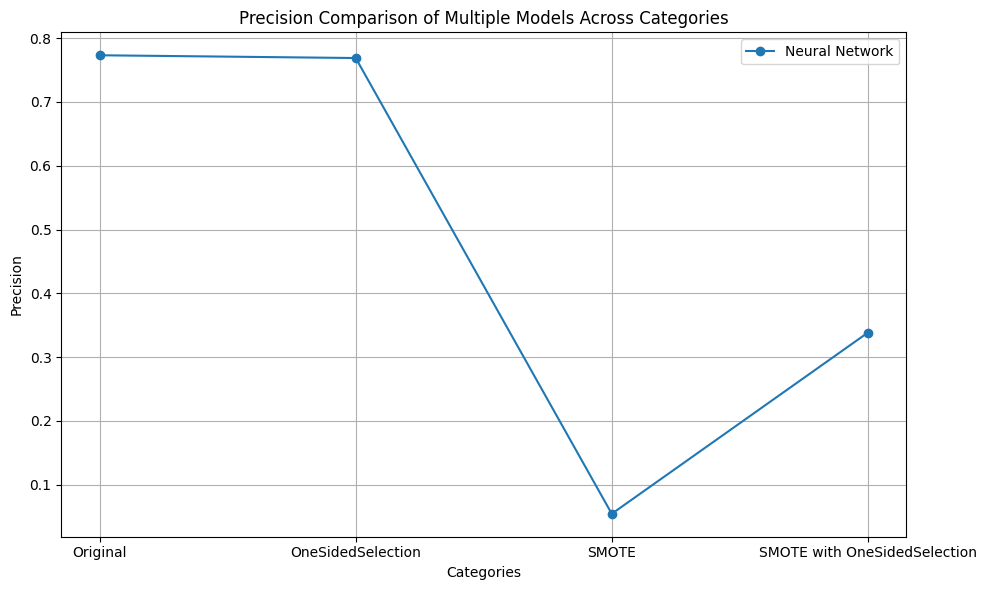

In [169]:
visualize_accuracy(precisions_2d, model_names, categories, type="Precision")

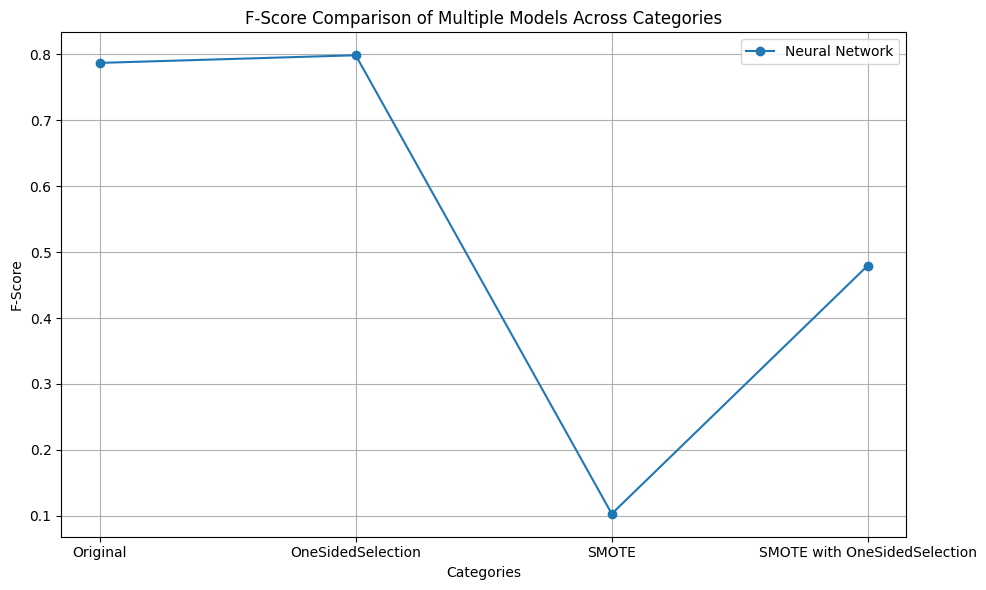

In [174]:
visualize_accuracy(f_scores_2d, model_names, categories, type="F-Score")

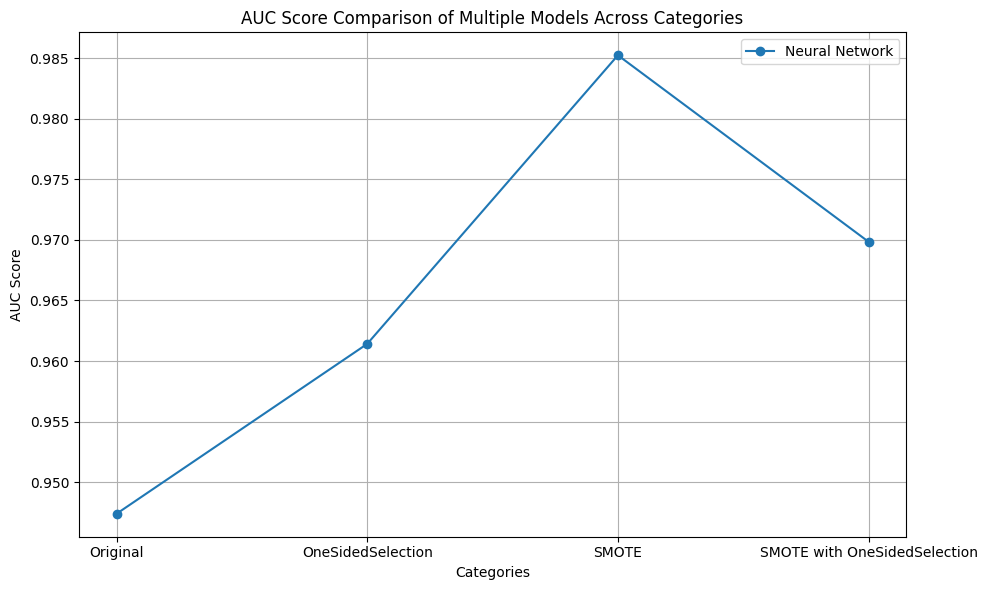

In [175]:
visualize_accuracy(auc_scores_2d, model_names, categories, type="AUC Score")

## ANOMALY DETECTION

In [185]:
def oneClassSVM_model(X_train, X_test):
    model = OneClassSVM(kernel="rbf", gamma='auto', nu=0.01)
    model.fit(X_train)
    pred = model.predict(X_test)
    pred = [1 if i < 0 else 0 for i in pred]
    return pred, model 

In [186]:
def IF_model(X_train, X_test):
    model = IsolationForest(contamination = 0.01, random_state=42)
    model.fit(X_train)
    pred = model.predict(X_test)
    pred = [1 if i < 0 else 0 for i in pred]
    return pred, model 

In [187]:
def print_customized_predictions(y_test, X_test, classifier):
    scores = classifier.score_samples(X_test)
    threshold = np.percentile(scores, 3) # score threshold for %3 of outliers
    new_pred = [1 if i < threshold else 0 for i in scores]
    precision = precision_score(y_test, new_pred, average='macro')  
    recall = recall_score(y_test, new_pred, average='macro')
    f1 = f1_score(y_test, new_pred, average='macro')
    print("New Predictions with Customized Threshold")
    classification = classification_report(y_test, new_pred)
    print()
    print("Classification Report:" "\n", classification) 
    print()
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print()
    print()
    return new_pred

In [188]:
def print_metrics(y_test, pred, X_test, classifier, model):
    precision = precision_score(y_test, pred, average='macro')  
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    classification = classification_report(y_test, pred)
    print()
    print("Classification Report:" "\n", classification) 
    print()
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print()
    print()
    if model == "one_class_svm":
        new_pred = print_customized_predictions(y_test, X_test, classifier)
        return new_pred


In [189]:
def print_score_board_anomaly_detection(y_test, X_test, X_train, model):
    if model == "one_class_svm":
        pred, classifier = oneClassSVM_model(X_train, X_test)
        print('===== {} ====='.format("ONE CLASS SUPPORT VECTOR MACHINE"))
        new_pred = print_metrics(y_test, pred, X_test, classifier, model)
    elif model == "if":
        pred, classifier = IF_model(X_train, X_test)
        print('===== {} ====='.format("ISOLATION FOREST"))
        print_metrics(y_test, pred, X_test, classifier, model)    


In [190]:
print_score_board_anomaly_detection(y_test, X_test, X_train_org, model="one_class_svm")

===== ONE CLASS SUPPORT VECTOR MACHINE =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.07      0.64      0.13       136

    accuracy                           0.99     85443
   macro avg       0.54      0.81      0.56     85443
weighted avg       1.00      0.99      0.99     85443


F1 Score:  0.5637122804245278
Precision:  0.5371447618848847
Recall:  0.8135521686724556


New Predictions with Customized Threshold

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.04      0.77      0.08       136

    accuracy                           0.97     85443
   macro avg       0.52      0.87      0.53     85443
weighted avg       1.00      0.97      0.98     85443


F1 Score:  0.5314863702488118
Precision:  0.520288799401733
Recall:  0.8716167609857546




In [191]:
print_score_board_anomaly_detection(y_test, X_test, X_train, model="if")

C:\Users\ilkim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


===== ISOLATION FOREST =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.22      0.51      0.31       136

    accuracy                           1.00     85443
   macro avg       0.61      0.75      0.65     85443
weighted avg       1.00      1.00      1.00     85443


F1 Score:  0.6548614804054165
Precision:  0.6119843620967135
Recall:  0.7522815088617649


